### 定义我们要重构的二重环的原图，保存在名为“Double_ring”的二维矩阵中，然后把它画出来

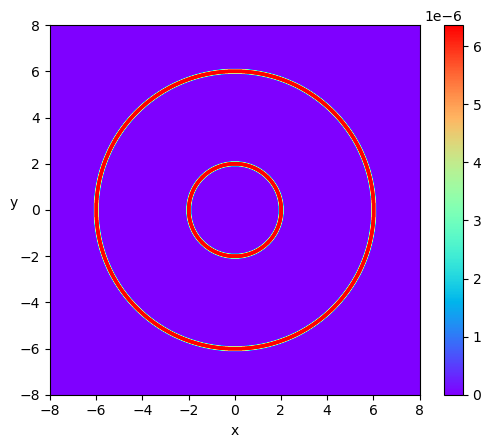

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import DIYfunction as DIY
import math
import sys

V=DIY.V=16   #定义函数存在的范围在边长为V的正方形之内
n_points=DIY.n_points=2000  #每条边有n_points个网格
deltaV=DIY.deltaV=DIY.V/DIY.n_points #每个网格宽deltaV
Number_constraints=DIY.Number_constraints=12 #有Number_constraints个约束条件

#构建双重环Double_ring
X=[]
Double_ring=np.zeros((n_points,n_points))
for index_x in range(n_points):
    x=-V/2+deltaV/2+index_x*deltaV
    X.append(x)
    for index_y in range(n_points):    
        y=-V/2+deltaV/2+index_y*deltaV
        if (1.9<=np.sqrt(x**2+y**2)<=2.1 or 5.9<=np.sqrt(x**2+y**2)<=6.1):
            Double_ring[index_x][index_y]=100
Double_ring=Double_ring/np.sum(Double_ring)            
DIY.Draw(Double_ring, "x", "y")    



### 这一段代码是为了定义约束条件和它们的方向，实际使用中这些数据应该由测量给出

In [2]:


G={}#G是约束条件的集合
A={}#A是约束条件的方向的集合
#构建约束条件和它们的方向
for i in range(Number_constraints):
    A[i]=DIY.rotation_matrix_2d((i*np.pi)/Number_constraints)
    G[i]=DIY.Line(DIY.Transmit_2d(A[i], Double_ring), 1)
           

### 调用Two_to_one_dimensional（）函数获得重构结果; 第一个输入的参数是约束条件G，它是所有约束条件的集合，每个约束条件都是一维的曲线；第二个输入的参数是约束条件的方向A，A[i]对应G[i]的方向，A[i]是2乘2的矩阵，表述从[x,y]方向到G[i]所在的方向的映射

differ= 0.2483150017310968
进行到第1轮迭代，正在计算第1个方向的h函数
进行到第1轮迭代，正在计算第2个方向的h函数
进行到第1轮迭代，正在计算第3个方向的h函数
进行到第1轮迭代，正在计算第4个方向的h函数
进行到第1轮迭代，正在计算第5个方向的h函数
进行到第1轮迭代，正在计算第6个方向的h函数
进行到第1轮迭代，正在计算第7个方向的h函数
进行到第1轮迭代，正在计算第8个方向的h函数
进行到第1轮迭代，正在计算第9个方向的h函数
进行到第1轮迭代，正在计算第10个方向的h函数
进行到第1轮迭代，正在计算第11个方向的h函数
进行到第1轮迭代，正在计算第12个方向的h函数
differ= 0.10022959544722478
进行到第2轮迭代，正在计算第1个方向的h函数
进行到第2轮迭代，正在计算第2个方向的h函数
进行到第2轮迭代，正在计算第3个方向的h函数
进行到第2轮迭代，正在计算第4个方向的h函数
进行到第2轮迭代，正在计算第5个方向的h函数
进行到第2轮迭代，正在计算第6个方向的h函数
进行到第2轮迭代，正在计算第7个方向的h函数
进行到第2轮迭代，正在计算第8个方向的h函数
进行到第2轮迭代，正在计算第9个方向的h函数
进行到第2轮迭代，正在计算第10个方向的h函数
进行到第2轮迭代，正在计算第11个方向的h函数
进行到第2轮迭代，正在计算第12个方向的h函数
differ= 0.04543883363652316
进行到第3轮迭代，正在计算第1个方向的h函数
进行到第3轮迭代，正在计算第2个方向的h函数
进行到第3轮迭代，正在计算第3个方向的h函数
进行到第3轮迭代，正在计算第4个方向的h函数
进行到第3轮迭代，正在计算第5个方向的h函数
进行到第3轮迭代，正在计算第6个方向的h函数
进行到第3轮迭代，正在计算第7个方向的h函数
进行到第3轮迭代，正在计算第8个方向的h函数
进行到第3轮迭代，正在计算第9个方向的h函数
进行到第3轮迭代，正在计算第10个方向的h函数
进行到第3轮迭代，正在计算第11个方向的h函数
进行到第3轮迭代，正在计算第12个方向的h函数
differ= 0.027468697997113198
进行到第4轮迭代，正在计算第1个方向的h函数
进行到第4轮迭代，正在计算第2个方向的h函数
进行到第4

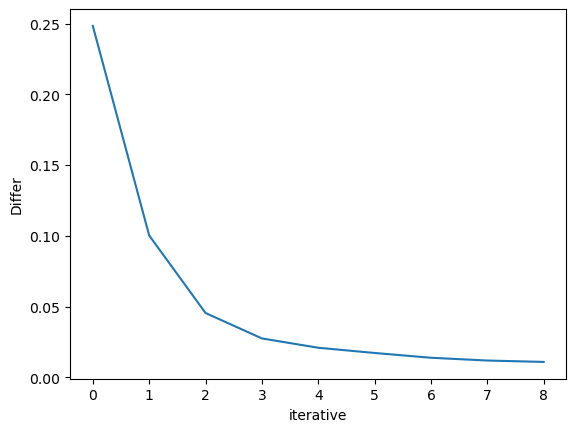

计算结果已保存在Rho_solution.npy


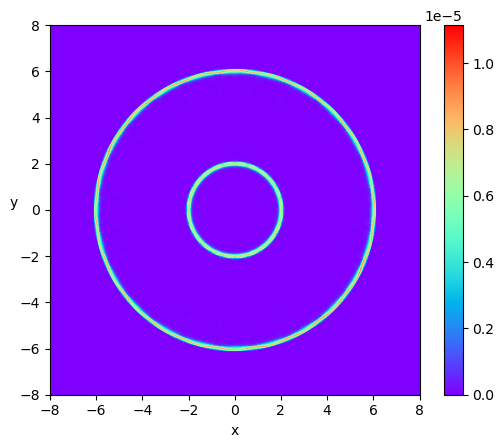

In [3]:

DIY.A=A
DIY.G=G
DIY.Two_to_one_dimensional(G,A)#获得重构结果


           

### 把重构结果保存在"Rho_solution.npy"；调用了compare函数，比较重构结果solution与我们先前定义的双重环Double_ring的区别，只比较分布密度，所以compare函数中是比较solution和Double_ring的归一化函数，允许了每个像素内的相对误差0.1，（1/2）累计差值和每个像素点的区别保存在txt文件；

In [4]:

DIY.solution=np.load("Rho_solution.npy")#保存重构结果
DIY.Double_ring=Double_ring
DIY.compare("solution", "Double_ring", 0.1) #把重构结果与之前构建的双重环比较

           
           

比较solution和Double_ring是否相同
统计solution和Double_ring所有的比较区别，结果保存在： errorsolution.txt


### 把约束条件和重构结果在各约束条件的方向的投影画在一起，蓝色的是约束条件，红色的是重构结果的投影

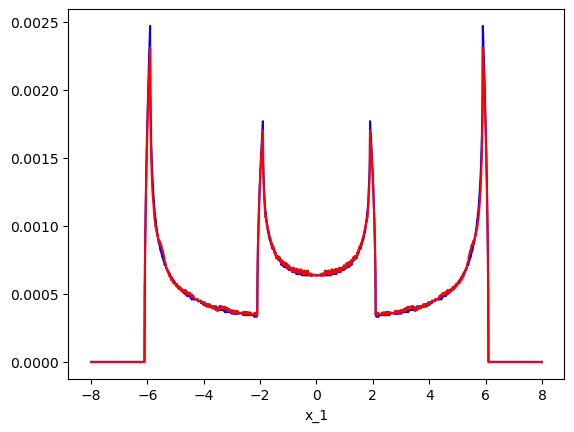

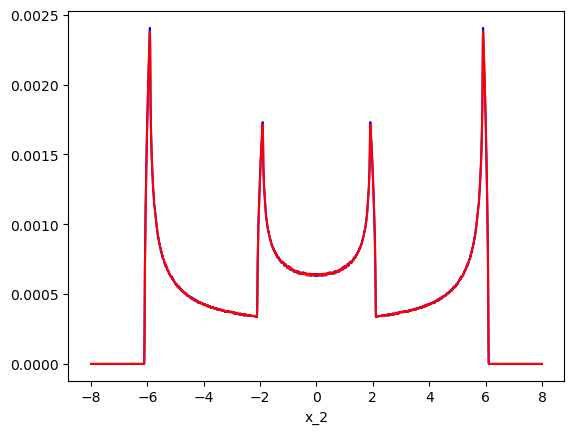

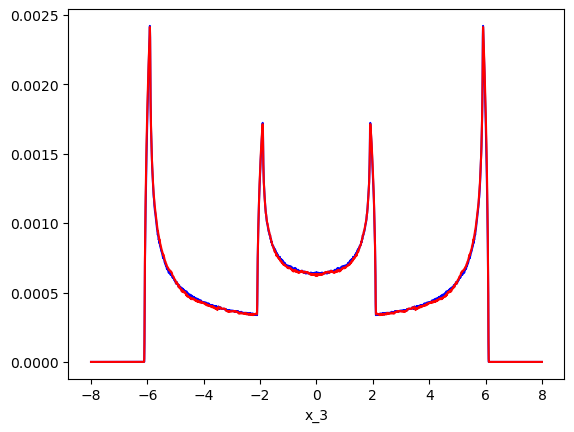

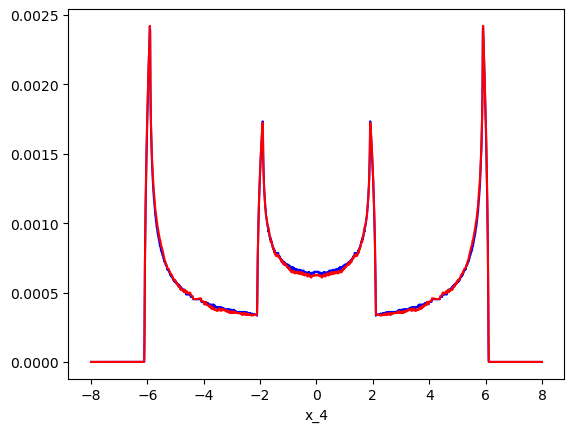

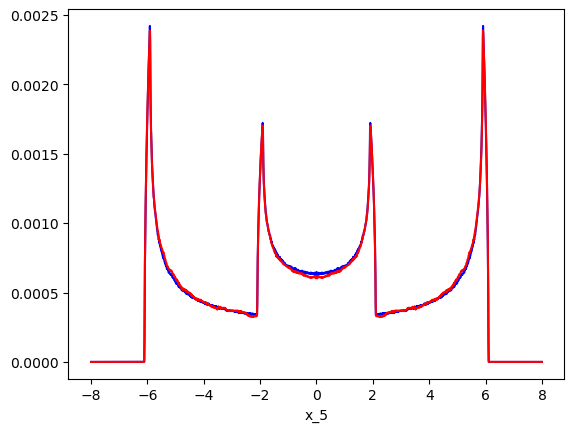

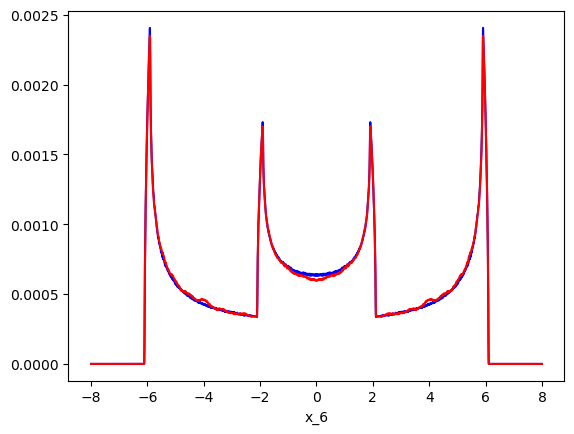

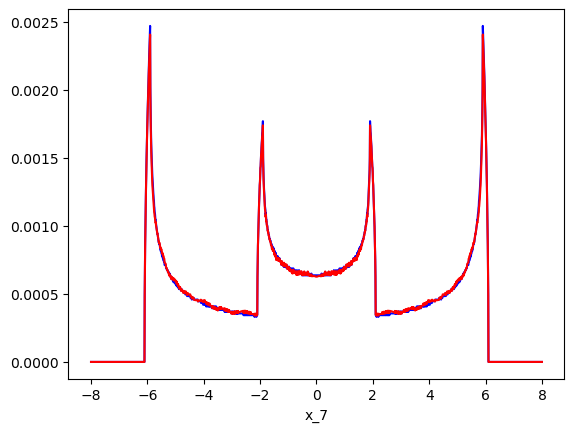

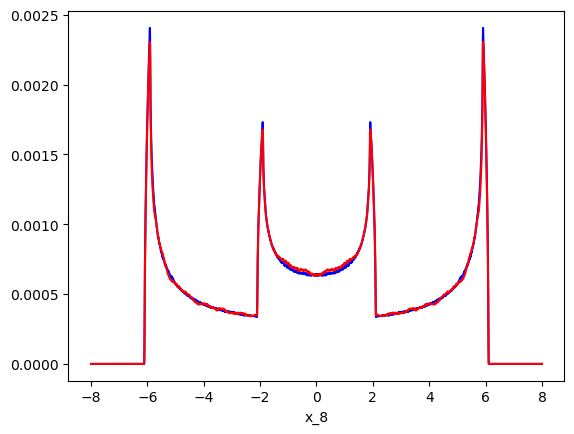

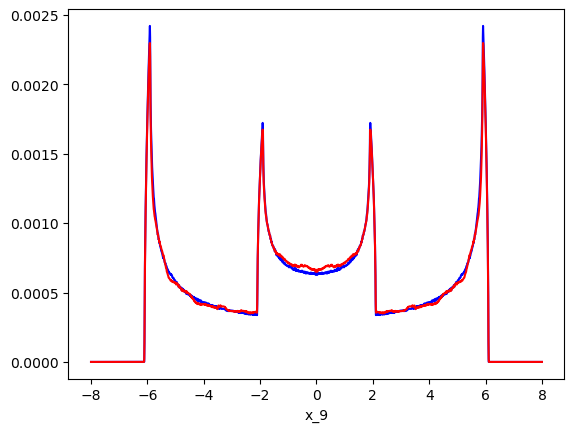

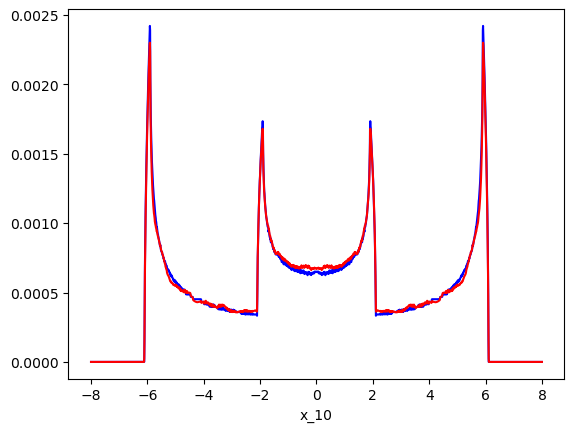

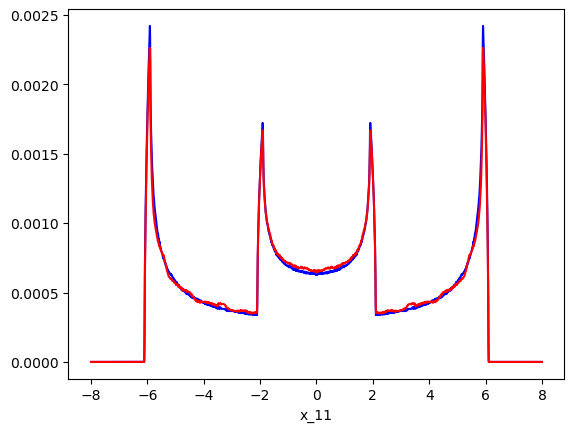

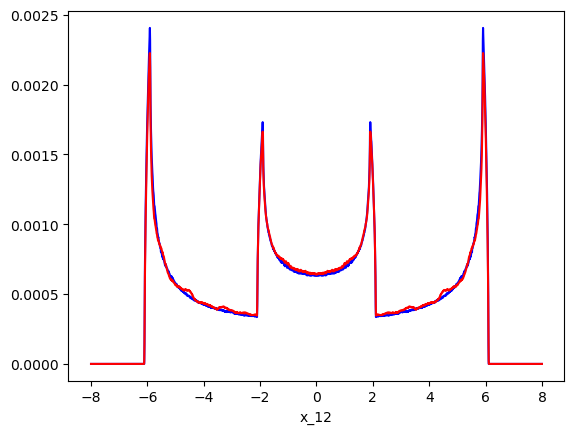

In [5]:
projection={}
for i in range(Number_constraints):
    plt.plot(X,G[i],"b")
    plt.xlabel(f"x_{i+1}")
    
    projection[i]=DIY.Line(DIY.Transmit_2d(A[i], DIY.solution), 1)
    plt.plot(X,projection[i],"r")
    plt.xlabel(f"x_{i+1}")
    plt.show()
